In [1]:
from databaseCommunication import getNCount, readDatabaseFile
from dataframeFormating import fitRun_3b_linear, N_linear, createLabeledDataFrame, createLabeledDataFrame_4, createLabeledDataFrame_images, fitRun_1and3b, fitRun_1and3b_2, fitRun_3b, fitRun_3b_2, fitRun_3b_3, getReducedDataframe, getReducedResults, deltaTime, N_polarized, N_polarized_pure3b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

getNCount(117000)

0.0

In [43]:
#array = readDatabaseFile(133151)[:, 750:950, 1150:1350]

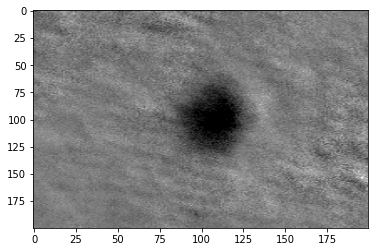

In [44]:
#plt.figure()
#plt.imshow(np.log((array[1]-array[2])/(array[0]-array[2])), cmap='gray_r', aspect='auto', vmin=-1, vmax=1)
#plt.show()

In [2]:
# [imagingFrequency], [imageID_start, imageID_end]
# TOF for these runs is 8ms
# eight run is in situ images from the top. 25 GHz for all, the label in the df is changed to the imagingFrequency
# PD at all the different values, hold = 0 and 10 with imagingFreq at 6.5 and 7

labels_insitu = [[['7.8'], [133079, 133150]],
        [['6.5'], [133151, 133222]],
        [['7.8'], [133223, 133234]],
        [['6.5'], [133235, 133246]],
         ] # I first wrote 133078 as the first imageID, I hope there is no mistake...
# Crop could be taken around 1150..700 -> 1350..940
excluded = []
#label_head = ['name1', 'name2']

In [3]:
"""df = createLabeledDataFrame_images(labels_insitu)

df['BECHoldTime'] = df['BECHoldTime'].astype(float)
df['latticeDepth'] = df['latticeDepth'].astype(float)
df['ODT3_Comp'] = df['ODT3_Comp'].astype(float)
df['latticeDetuning'] = df['latticeDetuning'].astype(float)
df['Y_rotation'] = df['Y_rotation'].astype(bool)
df['TOF'] = 0
#df.to_pickle('data_save_210419_insitu.pickle')"""

df = pd.read_pickle('data_save_210419_insitu.pickle')
df['TOF'] = 0

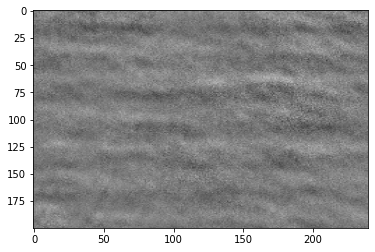

In [27]:
"""#crop = [[1150, 1350], [700, 940]]
crop = [[750, 950], [1150, 1350]]
#readDatabaseFile(133014)[:, crop[0][0]:crop[0][1], crop[1][0]:crop[1][1]]
array = readDatabaseFile(133153)[:, crop[0][0]:crop[0][1], crop[1][0]:crop[1][1]]
plt.figure()
plt.imshow(np.log((array[1]-array[2])/(array[0]-array[2])), cmap='gray_r', aspect='auto', vmin=-1, vmax=1)
plt.show()"""

array = df[df['imageID'] == 133176]['imageData'].iloc[0]
plt.figure()
plt.imshow(np.log((array[1]-array[2])/(array[0]-array[2])), cmap='gray_r', aspect='auto', vmin=-1, vmax=1)
plt.show()

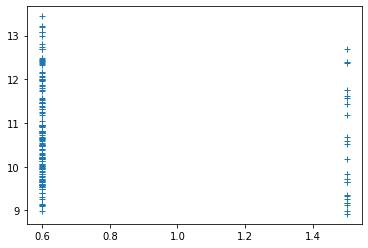

In [31]:
plt.figure()
plt.plot(df['ODT3_Comp'], df['xWidth'], '+')
plt.show()

In [40]:
def getRun(df, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = df[df['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

df_1 = df[df['ODT3_Comp'] == 0.6]
df_1 = df_1[df_1['BECHoldTime'] == 0]
df_2 = df[df['ODT3_Comp'] == 1.5]
df_2 = df_2[df_2['BECHoldTime'] == 0]

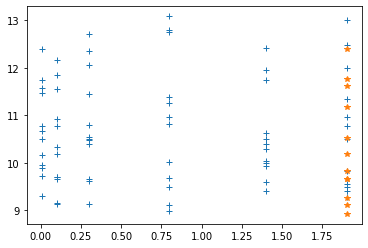

In [41]:
plt.figure()
plt.plot(df_1['latticeDepth'], df_1['xWidth'], '+')
plt.plot(df_2['latticeDepth'], df_2['xWidth'], '*')
#plt.ylim(0,25)
plt.show()

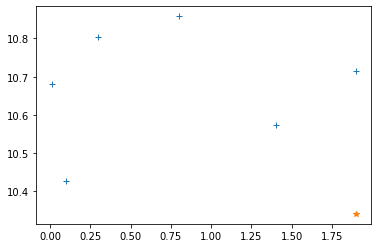

In [48]:
df_3 = df_1.groupby('latticeDepth').mean()
df_4 = df_2.groupby('latticeDepth').mean()
plt.figure()
plt.plot(df_3['xWidth'], '+')
plt.plot(df_4['xWidth'], '*')
#plt.ylim(0,25)
plt.show()

In [47]:
df_4

,imageID,BECHoldTime,TOF,nCount,xWidth,yWidth,Y_rotation,ODT3_Comp,latticeDetuning
latticeDepth,,,,,,,,,
1.9,133235.916667,0.0,0,279556.083333,10.3407,18.197118,0.5,1.5,7.15


In [49]:
fitVariables = ['nCount', 'xWidth', 'yWidth']

In [51]:
fitVariablesString = ' '.join([variableFit for variableFit in fitVariables])

In [52]:
fitVariablesString

'nCount xWidth yWidth'